In [1]:
import numpy as np
import pyvista as pv
from tqdm.auto import tqdm

In [2]:
sphere = pv.Sphere(
    radius=5,
    theta_resolution=500,
    phi_resolution=500,
)

/Users/mkalai/miniconda3/envs/dev/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/mkalai/miniconda3/envs/dev/lib/python3.11/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


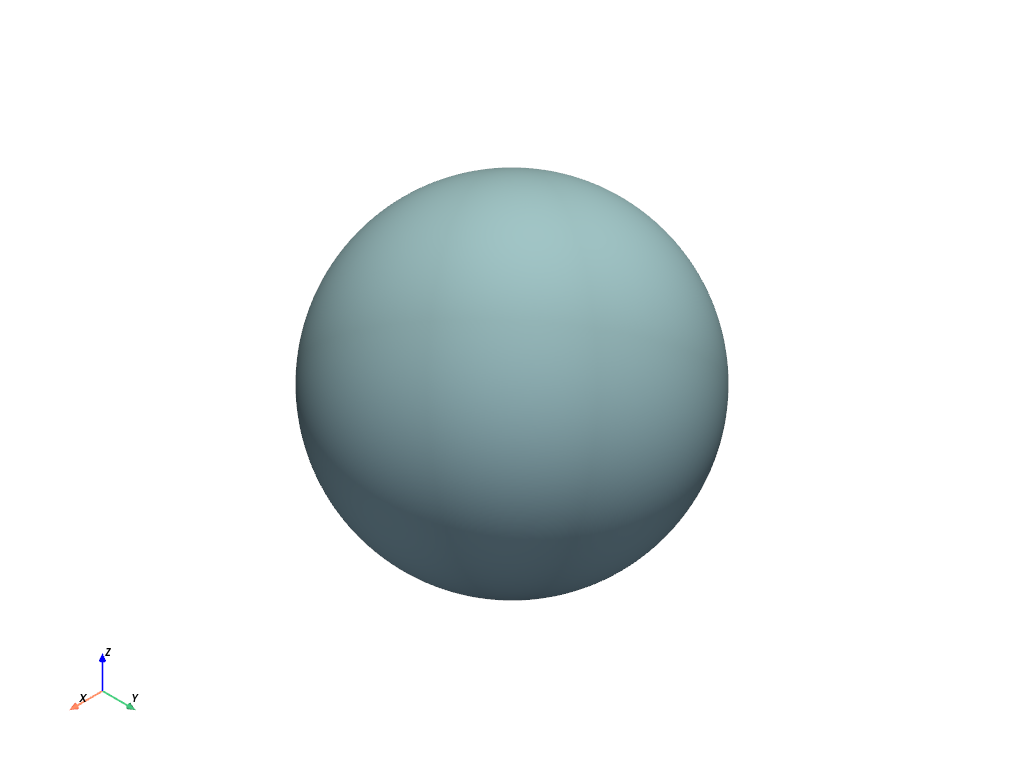

In [3]:
sphere.plot(show_edges=False)

In [4]:
def distort(sphere, magnitude_range=(0.5, 2.0), std_range=(0.5, 2.5)):

    # Get point coordinates and normals
    points = sphere.points
    normals = sphere.point_normals
    
    # Choose a random point on the sphere
    random_idx = np.random.randint(0, points.shape[0])
    random_point = points[random_idx]
    
    # Generate random Gaussian parameters
    magnitude = np.random.uniform(*magnitude_range)
    std = np.random.uniform(*std_range)
    
    # Apply Gaussian morph
    distances = np.linalg.norm(points - random_point, axis=1)
    gaussian = magnitude * np.exp(-0.5 * (distances / std) ** 2)
    displacement = gaussian[:, np.newaxis] * normals  # Move along normals
    
    # Update sphere points
    morphed_points = points + displacement
    morphed_sphere = sphere.copy()
    morphed_sphere.points = morphed_points
    
    return morphed_sphere

In [5]:
new_sphere = sphere.copy()
for i in tqdm(range(25)):
    new_sphere = distort(new_sphere)

  0%|          | 0/25 [00:00<?, ?it/s]

/Users/mkalai/miniconda3/envs/dev/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/mkalai/miniconda3/envs/dev/lib/python3.11/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


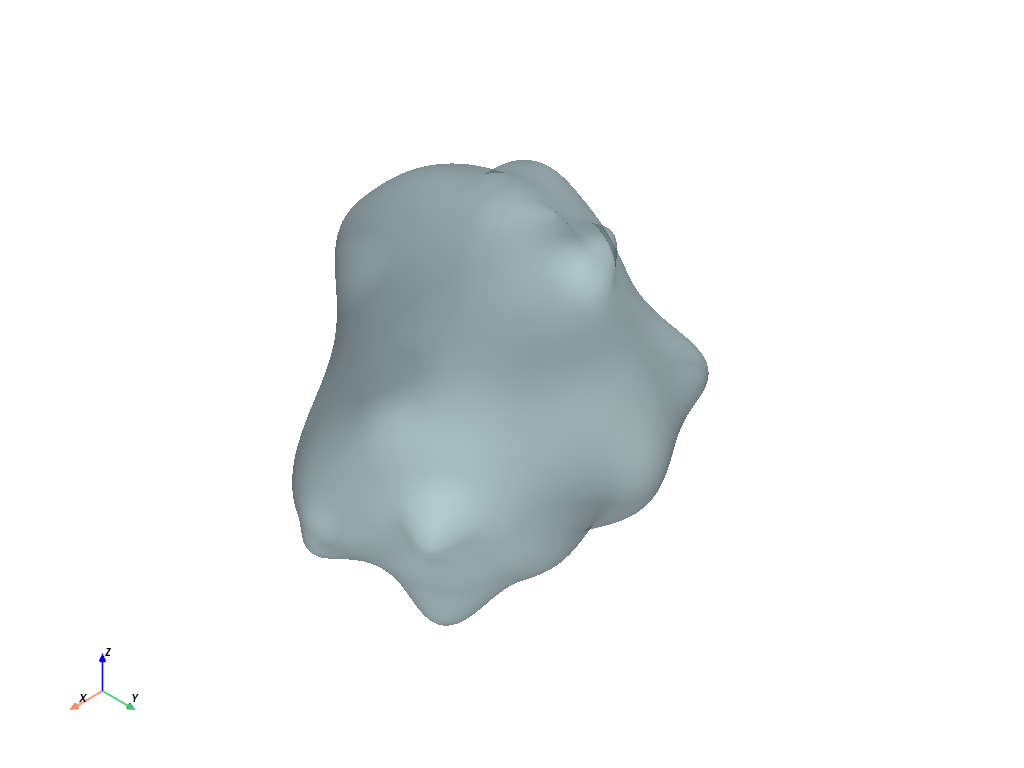

In [6]:
new_sphere.plot(opacity=0.5)

In [7]:
points = pv.PolyData(new_sphere.points)
points.save("points.vtk")

/Users/mkalai/miniconda3/envs/dev/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/mkalai/miniconda3/envs/dev/lib/python3.11/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


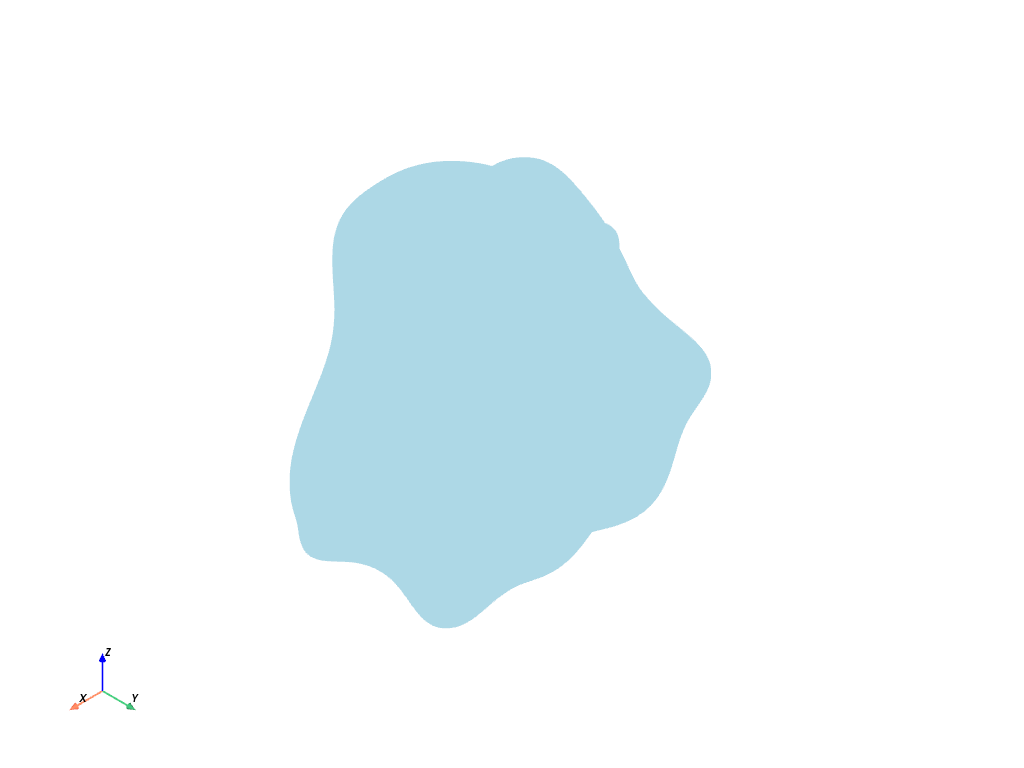

In [8]:
points.plot()